# Spotify lab, vol. 2

Since the data harvesting is nicely plodding along in the other notebook, I'm starting a new one to get the clustering going. I save the data there to songs.csv, so I'll have to get that into here first. 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import random

In [2]:
songs = pd.read_csv("songs.csv", sep = "|")

In [3]:
songs

,Unnamed: 0,index,titles,artists,uri,index.1,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri.1,track_href,analysis_url,duration_ms,time_signature
0,0,0,All Star,Smash Mouth,spotify:track:3cfOd4CMv2snFaKAnMdnvK,0,0.731,0.867,11.0,-5.881,...,0.0861,0.7760,104.019,audio_features,3cfOd4CMv2snFaKAnMdnvK,spotify:track:3cfOd4CMv2snFaKAnMdnvK,https://api.spotify.com/v1/tracks/3cfOd4CMv2sn...,https://api.spotify.com/v1/audio-analysis/3cfO...,200373.0,4.0
1,1,1,Sk8er Boi,Avril Lavigne,spotify:track:00Mb3DuaIH1kjrwOku9CGU,0,0.487,0.900,0.0,-4.417,...,0.3580,0.4840,149.937,audio_features,00Mb3DuaIH1kjrwOku9CGU,spotify:track:00Mb3DuaIH1kjrwOku9CGU,https://api.spotify.com/v1/tracks/00Mb3DuaIH1k...,https://api.spotify.com/v1/audio-analysis/00Mb...,204000.0,4.0
2,2,2,What's My Age Again?,blink-182,spotify:track:4LJhJ6DQS7NwE7UKtvcM52,0,0.391,0.951,6.0,-7.419,...,0.0878,0.4680,157.660,audio_features,4LJhJ6DQS7NwE7UKtvcM52,spotify:track:4LJhJ6DQS7NwE7UKtvcM52,https://api.spotify.com/v1/tracks/4LJhJ6DQS7Nw...,https://api.spotify.com/v1/audio-analysis/4LJh...,148360.0,4.0
3,3,3,A Thousand Miles,Vanessa Carlton,spotify:track:4w1lzcaoZ1IC2K5TwjalRP,0,0.560,0.825,11.0,-3.862,...,0.1610,0.2680,94.931,audio_features,4w1lzcaoZ1IC2K5TwjalRP,spotify:track:4w1lzcaoZ1IC2K5TwjalRP,https://api.spotify.com/v1/tracks/4w1lzcaoZ1IC...,https://api.spotify.com/v1/audio-analysis/4w1l...,237493.0,4.0
4,4,4,Welcome to the Black Parade,My Chemical Romance,spotify:track:5wQnmLuC1W7ATsArWACrgW,0,0.217,0.905,2.0,-4.103,...,0.2220,0.2360,96.950,audio_features,5wQnmLuC1W7ATsArWACrgW,spotify:track:5wQnmLuC1W7ATsArWACrgW,https://api.spotify.com/v1/tracks/5wQnmLuC1W7A...,https://api.spotify.com/v1/audio-analysis/5wQn...,311107.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,8335,1671,The World's First Ever Monster Truck Front Flip,Arctic Monkeys,spotify:track:7dWSVDMwoJXMqnG21AehRG,0,0.602,0.601,10.0,-5.742,...,0.0735,0.5530,145.075,audio_features,7dWSVDMwoJXMqnG21AehRG,spotify:track:7dWSVDMwoJXMqnG21AehRG,https://api.spotify.com/v1/tracks/7dWSVDMwoJXM...,https://api.spotify.com/v1/audio-analysis/7dWS...,180013.0,4.0
8336,8336,1672,Body Paint,Arctic Monkeys,spotify:track:11jRCxY01k9jvCdUru0EeP,0,0.560,0.313,7.0,-11.653,...,0.0767,0.2540,144.745,audio_features,11jRCxY01k9jvCdUru0EeP,spotify:track:11jRCxY01k9jvCdUru0EeP,https://api.spotify.com/v1/tracks/11jRCxY01k9j...,https://api.spotify.com/v1/audio-analysis/11jR...,290584.0,4.0
8337,8337,1673,My Purple iPod Nano,jamesjamesjames,spotify:track:0Zp9bIm1BeIyFiYNAof3Sm,0,0.759,0.888,10.0,-10.005,...,0.1840,0.0583,132.966,audio_features,0Zp9bIm1BeIyFiYNAof3Sm,spotify:track:0Zp9bIm1BeIyFiYNAof3Sm,https://api.spotify.com/v1/tracks/0Zp9bIm1BeIy...,https://api.spotify.com/v1/audio-analysis/0Zp9...,412702.0,4.0
8338,8338,1674,Turn On The Lights again.. (feat. Future),Fred again..,spotify:track:6gdDu39yYqPcaTgCwYEW8i,0,0.683,0.887,6.0,-4.944,...,0.3180,0.5510,132.007,audio_features,6gdDu39yYqPcaTgCwYEW8i,spotify:track:6gdDu39yYqPcaTgCwYEW8i,https://api.spotify.com/v1/tracks/6gdDu39yYqPc...,https://api.spotify.com/v1/audio-analysis/6gdD...,267947.0,4.0


In [4]:
# Some minimal cleaning (I should have put "drop = True" into my function before - keep adding new indexes)
songs = songs.drop(columns = ["Unnamed: 0", "index", "index.1"]).copy()

In [5]:
songs = songs[~songs['tempo'].isna()]

Then get out the big guns: the kaggle data

In [6]:
songs2 = pd.read_csv("SpotifyAudioFeaturesApril2019.csv")
songs3 = pd.read_csv("SpotifyAudioFeaturesNov2018.csv")

In [7]:
display(songs.columns)
display(songs2.columns)

Index(['titles', 'artists', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri.1', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

In [8]:
songs2 = songs2.rename(columns = {"artist_name": "artists", "track_name": "titles"}).copy()

In [9]:
songs3 = songs3.rename(columns = {"artist_name": "artists", "track_name": "titles"}).copy()

In [10]:
songs2 = songs2.drop(columns = ["track_id"]).copy()

In [11]:
songs3 = songs3.drop(columns = ["track_id"]).copy()

In [12]:
songs2

,artists,titles,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [13]:
# I will normalize everything by dropping all the columns from my own 'songs' df that are not in the kaggle ones:

songs = songs.drop(columns = ['uri', 'type', 'id', 'uri.1', 'track_href', 'analysis_url']).copy()

In [14]:
songs2.columns

Index(['artists', 'titles', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'],
      dtype='object')

In [15]:
songs.columns

Index(['titles', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [16]:
# Oops, and drop 'popularity' from songs2 and songs3 as well...

songs2 = songs2.drop(columns = ["popularity"])
songs3 = songs3.drop(columns = ["popularity"])

In [17]:
len(songs2.columns)

15

then reorder so that all the dfs have the columns in the same order. 

In [18]:
columns = songs.columns.tolist()

In [19]:
songs2 = songs2[columns]

In [22]:
songs3 = songs3[columns]

And then concatenate the lot

In [23]:
songs = pd.concat([songs, songs2, songs3], axis = 0)

In [26]:
#songs

In [27]:
songs.isna().sum()

titles              0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

Looking good.

## On to the clustering!

### First, finding the right value for k

In [30]:
# I need to filter out the non-numeric data first.
songsnum = songs.select_dtypes(include = np.number)

In [32]:
#songsnum

In [33]:
K = range(2, 20)
inertia = []
silhouette = []


for k in K:
    kmeans = cluster.KMeans(n_clusters=k,
                    random_state=1989)
    kmeans.fit(songsnum)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(songsnum, kmeans.predict(songsnum)))



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

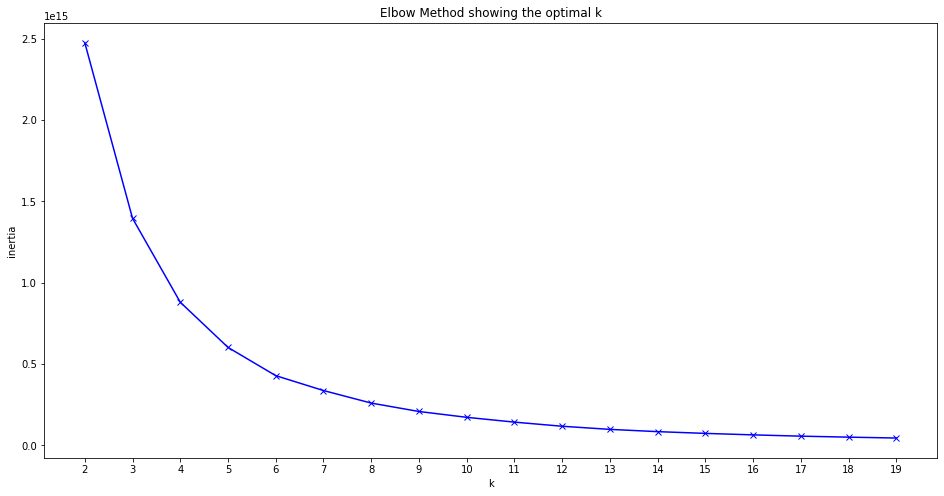

In [34]:
# Show the elbow graph thing
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

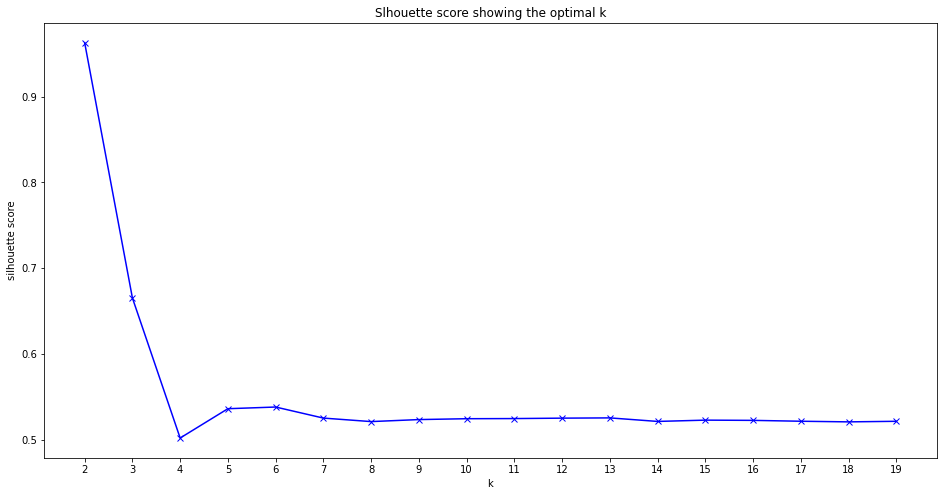

In [35]:
# Show the silhouette score
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

The graphs would suggest using a very small number of clusters (2 or 3), but I want to be able to be a bit more granular with the recommendations. So instead, I'll pick 15 (fifteen) clusters. The silhouette score suggests that above 7 there's not a big difference anymore. Curious to see how this will go. 

### Next, assigning clusters to my songs

In [ ]:
# First, scale the previous.

In [36]:
scaler = StandardScaler()
scaler.fit(songsnum)

StandardScaler()

In [37]:
scaled = scaler.transform(songsnum)

In [38]:
kmeans = cluster.KMeans(n_clusters=15, random_state=1989)
kmeans.fit(scaled)

KMeans(n_clusters=15, random_state=1989)

In [39]:
clusters = kmeans.predict(scaled)

In [40]:
clusters

array([ 6, 11, 11, ..., 12, 11, 13], dtype=int32)

In [41]:
len(clusters)

255374

Append these to my dataframe

In [42]:
songs['cluster'] = clusters

In [44]:
songs.head(60)

,titles,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,All Star,Smash Mouth,0.731,0.867,11.0,-5.881,1.0,0.0320,0.039500,0.000000,0.0861,0.776,104.019,200373.0,4.0,6
1,Sk8er Boi,Avril Lavigne,0.487,0.900,0.0,-4.417,1.0,0.0482,0.000068,0.000000,0.3580,0.484,149.937,204000.0,4.0,11
2,What's My Age Again?,blink-182,0.391,0.951,6.0,-7.419,1.0,0.0692,0.012600,0.000378,0.0878,0.468,157.660,148360.0,4.0,11
3,A Thousand Miles,Vanessa Carlton,0.560,0.825,11.0,-3.862,1.0,0.0379,0.323000,0.000000,0.1610,0.268,94.931,237493.0,4.0,6
4,Welcome to the Black Parade,My Chemical Romance,0.217,0.905,2.0,-4.103,1.0,0.0752,0.000289,0.000110,0.2220,0.236,96.950,311107.0,4.0,11
5,Groovejet (If This Ain't Love) [feat. Sophie E...,Spiller,0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,227619.0,4.0,12
6,Let's Get Loud,Jennifer Lopez,0.820,0.937,5.0,-4.810,0.0,0.0549,0.135000,0.000122,0.3500,0.906,130.992,239400.0,4.0,12
7,Teenage Dirtbag,Wheatus,0.625,0.850,4.0,-3.904,1.0,0.0495,0.346000,0.000233,0.1740,0.633,94.661,241667.0,4.0,3
8,Careless Whisper,George Michael,0.574,0.628,2.0,-8.815,0.0,0.0360,0.130000,0.000000,0.2710,0.803,153.119,300107.0,4.0,4
9,Crazy In Love (feat. Jay-Z),Beyoncé,0.646,0.770,2.0,-6.596,0.0,0.2260,0.002490,0.000000,0.0715,0.681,99.165,236133.0,4.0,4


## Recap for previous lab

I need to re-load my 'hot songs' from the previous lab as well, before I can make the recommender work.

In [45]:
hotsongs = pd.read_csv("hotsongs.csv", sep = "|")

In [115]:
hotsongs.head(60)

,Unnamed: 0,Title,Artist
0,0,The Chipmunk Song (Christmas Don't Be Late),The Chipmunks with David Seville
1,1,Smoke Gets in Your Eyes,The Platters
2,2,Stagger Lee,Lloyd Price
3,3,Venus,Frankie Avalon
4,4,Come Softly to Me,The Fleetwoods
5,5,The Happy Organ,"Dave ""Baby"" Cortez"
6,6,Kansas City,Wilbert Harrison
7,7,The Battle of New Orleans,Johnny Horton
8,8,Lonely Boy,Paul Anka
9,9,A Big Hunk o' Love,Elvis Presley


In [114]:
hotsongs['Title'].unique()

array(["The Chipmunk Song (Christmas Don't Be Late)",
       'Smoke Gets in Your Eyes', 'Stagger Lee', ..., 'Break My Soul',
       'Super Freaky Girl', 'Bad Habit'], dtype=object)

# The recommender (take 2)

In [137]:
# What this function presupposes: 
# The dataframe 'hotsongs'
# The scaler 'scaler'
# The kmeans clustering 'kmeans'

def recommender():
    song = input("Enter song title: ")
    

    # First, check the hotsongs list
    # I did this the clunky way (looping through all the songs by index) for two reasons: 
    #   - It makes it possible (or at least easy) to do a case insensitive comparison
    #   - It makes it possible (or at least easy) to retrieve the title *and artist* for the entry.
    
    for i in range(len(hotsongs)): 
        if song.casefold() == hotsongs['Title'].iloc[i].casefold():
            print("You entered: '", hotsongs['Title'].iloc[i], "', by", hotsongs['Artist'].iloc[i])
            
            number = random.randint(0,len(hotsongs))
            title = hotsongs['Title']
            artist = hotsongs['Artist']
            print("Try this other hot song:")
            print("Title:  ", hotsongs['Title'].iloc[number])
            print("Artist: ", hotsongs['Artist'].iloc[number])
            return 
    # One limitation here is that it will only return the first song on the list with any given title.
    # However, I think most duplicates are re-entries of the same song, so that shouldn't matter. 
        
     
    
    # Then, if it is not on the hot songs list, go to Spotify:
    
    else: 
        # Authenticate connection
        secrets = open("secrets.txt", "r")
        a = secrets.read()
        a = a.split("\n")
        cl_id = a[0]
        cl_sec = a[1]
        try: 
            sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=cl_id,
                                                          client_secret=cl_sec))
        except: 
            print("Not able to make connection")
            return
        #Todo: what if the song title does not exist? See what error spotify throws and make an except for that.
        
        
        # Search for song and store the data in a frame 
        
        try: 
            results = sp.search(q=song, limit=1)
        except: 
            print("Invalid search")
            return
        
#         try:
#             test = results['tracks']['items'][0]['album'] # to test if the query returns any content
#         except: 
#             print("No such song in the Spotify library")
#             return
            
        print(results['tracks']['items'])
        title = results['tracks']['items'][0]['name']
        artist = results['tracks']['items'][0]['artists'][0]['name']
        uri = results['tracks']['items'][0]['uri']

        
        # Get features, and normalize into a dataframe
        features = sp.audio_features(uri)
        featuresdata = pd.json_normalize(features)
        featuresdata_num = featuresdata.select_dtypes(include = np.number)
        scaled = scaler.transform(featuresdata_num)
        
        
        # RECOMMENDATION
        predcluster = kmeans.predict(scaled)[0]

        available_songs = songs[songs['cluster'] == predcluster]
        available_songs.reset_index(inplace = True, drop= True)
        
        num = randint(0,len(available_songs))
        print(f"You entered '{title}', by {artist}.")
        print("Our recommendation: ")
        print("Title:  ", available_songs['titles'].iloc[num], "\nArtist: ", available_songs['artists'].iloc[num])
        
        
    return

In [139]:
recommender()

Enter song title: out of step
[{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/07PiZYrhllpSXtELkUxlrf'}, 'href': 'https://api.spotify.com/v1/artists/07PiZYrhllpSXtELkUxlrf', 'id': '07PiZYrhllpSXtELkUxlrf', 'name': 'Minor Threat', 'type': 'artist', 'uri': 'spotify:artist:07PiZYrhllpSXtELkUxlrf'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 

In [123]:
recommender()

Enter song title: 0
No such song in the Spotify library


In [124]:
recommender()

Enter song title: pokerface
No such song in the Spotify library


In [125]:
recommender()

Enter song title: poker face
You entered: ' Poker Face ', by Lady Gaga
Try this other hot song:
Title:   Rock with You
Artist:  Michael Jackson


In [126]:
recommender()

Enter song title: out of step
No such song in the Spotify library


In [ ]:
recommender()